In [1]:
%run ./OpenFASOC/openfasoc/generators/glayout/gds_display.py.

In [2]:
%cd ./level_shifter/

c:\Users\ARF-DESIGN-CD7\open-source\level_shifter


c:\Users\ARF-DESIGN-CD7\anaconda3\envs\RajPandey\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from glayout.flow.pdk.util.comp_utils import evaluate_bbox
from glayout.flow.pdk.mappedpdk import MappedPDK
from glayout.flow.routing.straight_route import straight_route
from gdsfactory import Component
from glayout.flow.primitives.fet import pmos, nmos 
from glayout.flow.primitives.guardring import tapring
from glayout.flow.routing.c_route import c_route
# from glayout.flow.routing.L_route import L_route

2024-08-08 10:29:33.039 | INFO     | gdsfactory.pdk:activate:337 - 'sky130' PDK is now active


C:\Users\ARF-DESIGN-CD7\AppData\Local\Temp\ipykernel_13824\2528535313.py:135: UserWarning: Unnamed cells, 11 in 'Unnamed_0bab44e9'
  Level_shifter (pdk=sky130).write_gds("Level_shifter.gds")
2024-08-08 10:29:41.251 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'Level_shifter.gds'


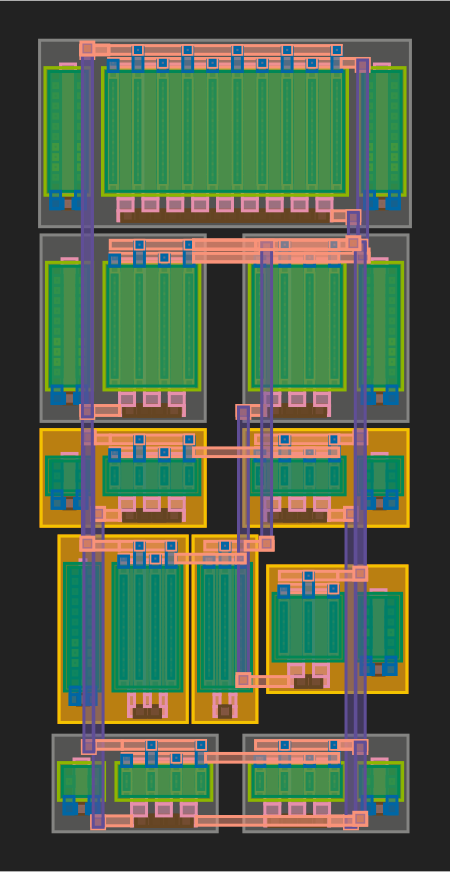

In [4]:
def Level_shifter(pdk: MappedPDK):
    level_shifterComp = Component()
    
#pmos
    pfet_pmos1 = pmos(pdk, length=0.50, width= 1.00,multipliers=1,fingers=3,with_dummy=[False,True], with_substrate_tap =False , with_tie  =False)
    pfet_pmos2 = pmos(pdk, length=0.50, width= 1.00,multipliers=1,fingers=3,with_dummy=[True,False], with_substrate_tap =False , with_tie  =False)
    pfet_pmos3 = pmos(pdk, length=0.50, width= 4.00,multipliers=1,fingers=9,with_dummy=[True,True], with_substrate_tap =False , with_tie  =False)
    pfet_pmos4 = pmos(pdk, length=0.50, width= 4.00,multipliers=1,fingers=3,with_dummy=[True,False], with_substrate_tap =False , with_tie  =False)
    pfet_pmos5 = pmos(pdk, length=0.50, width= 4.00,multipliers=1,fingers=3,with_dummy=[False,True], with_substrate_tap =False , with_tie  =False)

#nmos    ``
    nfet_nmos1 = nmos(pdk, length=0.50,width=1.00, multipliers=1,fingers=3,with_dummy=[False,True], with_substrate_tap =False , with_tie  =False)
    nfet_nmos2 = nmos(pdk, length=0.50,width=1.00, multipliers=1,fingers=3,with_dummy=[True,False], with_substrate_tap =False , with_tie  =False)
    nfet_nmos3 = nmos(pdk, length=0.20,width=4.00, multipliers=1,fingers=3,with_dummy=[True,False], with_substrate_tap =False , with_tie  =False)
    nfet_nmos4 = nmos(pdk, length=0.20,width=4.00, multipliers=1,fingers=2,with_dummy=[False,False], with_substrate_tap =False , with_tie  =False)
    nfet_nmos5 = nmos(pdk, length=0.50,width=2.00, multipliers=1,fingers=2,with_dummy=[False,True], with_substrate_tap =False , with_tie  =False)
    
    cpmos1_pmos = level_shifterComp << pfet_pmos1
    cpmos2_pmos = level_shifterComp << pfet_pmos2
    cpmos3_pmos = level_shifterComp << pfet_pmos3
    cpmos4_pmos = level_shifterComp << pfet_pmos4
    cpmos5_pmos = level_shifterComp << pfet_pmos5
    
    cnmos1_nmos = level_shifterComp << nfet_nmos1
    cnmos2_nmos = level_shifterComp << nfet_nmos2
    cnmos3_nmos = level_shifterComp << nfet_nmos3
    cnmos4_nmos = level_shifterComp << nfet_nmos4
    cnmos5_nmos = level_shifterComp << nfet_nmos5
    
        
    pdk.util_max_metal_seperation()
    
    
# VDD
    def evaluate_bbox(component):
        return (0,5)
    bbox_value = evaluate_bbox(nfet_nmos2)[0]
    cpmos2_pmos.movex(bbox_value + pdk.util_max_metal_seperation())
    
    def evaluate_bbox(component):
        return (0,6.37)
    bbox_value = evaluate_bbox(nfet_nmos1)[1]
    cpmos1_pmos.movex(bbox_value + pdk.util_max_metal_seperation())
    
    
# VSS    
    def evaluate_bbox(component):
        return (0,4.75)
    bbox_value = evaluate_bbox(pfet_pmos3)[1]
    cnmos3_nmos.movey(bbox_value + pdk.util_max_metal_seperation())
    

    def evaluate_bbox(component):
        return (3,4.75)
    bbox_value = evaluate_bbox(pfet_pmos4)
    x_offset = bbox_value[0]
    y_offset = bbox_value[1]
    cnmos4_nmos.move((x_offset + pdk.util_max_metal_seperation(), y_offset + pdk.util_max_metal_seperation()))
    
    def evaluate_bbox(component):
        return (6.75,4.75)
    bbox_value = evaluate_bbox(pfet_pmos5)
    x_offset = bbox_value[0]
    y_offset = bbox_value[1]
    cnmos5_nmos.move((x_offset + pdk.util_max_metal_seperation(), y_offset + pdk.util_max_metal_seperation()))
    
    def evaluate_bbox(component):
        return (3,9.80)
    bbox_value = evaluate_bbox(pfet_pmos2)[1]
    cnmos2_nmos.movey(bbox_value + pdk.util_max_metal_seperation())
    
    def evaluate_bbox(component):
        return (6.37,9.80)
    bbox_value = evaluate_bbox(pfet_pmos1)
    x_offset = bbox_value[0]
    y_offset = bbox_value[1]
    cnmos1_nmos.move((x_offset + pdk.util_max_metal_seperation(), y_offset + pdk.util_max_metal_seperation()))
    
    
# VDDH
    def evaluate_bbox(component):
        return (0,14.80)
    bbox_value = evaluate_bbox(nfet_nmos4)[1]
    cpmos4_pmos.movey(bbox_value + pdk.util_max_metal_seperation())
    
    
    def evaluate_bbox(component):
        return (6.37,14.80)
    bbox_value = evaluate_bbox(nfet_nmos5)
    x_offset = bbox_value[0]
    y_offset = bbox_value[1]
    cpmos5_pmos.move((x_offset + pdk.util_max_metal_seperation(), y_offset + pdk.util_max_metal_seperation()))
    
    def evaluate_bbox(component):
        return (3,21.30)
    bbox_value = evaluate_bbox(nfet_nmos3)
    x_offset = bbox_value[0]
    y_offset = bbox_value[1]
    cpmos3_pmos.move((x_offset + pdk.util_max_metal_seperation(), y_offset + pdk.util_max_metal_seperation()))
   
   
   
   
    # # # #Gate Connection
    level_shifterComp << c_route(pdk, cpmos2_pmos.ports["multiplier_0_gate_W"], cnmos2_nmos.ports["multiplier_0_gate_W"])
    level_shifterComp << c_route(pdk, cpmos5_pmos.ports["multiplier_0_gate_W"], cnmos5_nmos.ports["multiplier_0_gate_W"])
    level_shifterComp << c_route(pdk, cpmos1_pmos.ports["multiplier_0_gate_E"], cnmos1_nmos.ports["multiplier_0_gate_E"])
     
    # # # # # # Source Connection 
    level_shifterComp << straight_route(pdk, cpmos1_pmos.ports["multiplier_0_source_E"], cpmos2_pmos.ports["multiplier_0_source_E"])
    level_shifterComp << c_route(pdk, cpmos3_pmos.ports["multiplier_0_source_E"], cpmos4_pmos.ports["multiplier_0_source_E"])
    level_shifterComp << straight_route(pdk, cpmos4_pmos.ports["multiplier_0_source_E"], cpmos5_pmos.ports["multiplier_0_source_E"])
    level_shifterComp << straight_route(pdk, cnmos1_nmos.ports["multiplier_0_source_E"], cnmos2_nmos.ports["multiplier_0_source_E"])
    level_shifterComp << straight_route(pdk, cnmos3_nmos.ports["multiplier_0_source_E"], cnmos4_nmos.ports["multiplier_0_source_E"])
  

    # # # Drain Connection 
    level_shifterComp << c_route(pdk, cpmos1_pmos.ports["multiplier_0_drain_E"], cnmos1_nmos.ports["multiplier_0_drain_E"])
    level_shifterComp << c_route(pdk, cpmos2_pmos.ports["multiplier_0_drain_W"], cnmos2_nmos.ports["multiplier_0_drain_W"])
    level_shifterComp << c_route(pdk, cpmos3_pmos.ports["multiplier_0_drain_W"], cnmos3_nmos.ports["multiplier_0_drain_W"])
    level_shifterComp << c_route(pdk, cpmos4_pmos.ports["multiplier_0_drain_E"], cnmos4_nmos.ports["multiplier_0_drain_E"])
    level_shifterComp << c_route(pdk, cpmos5_pmos.ports["multiplier_0_drain_E"], cnmos5_nmos.ports["multiplier_0_drain_E"])      



    # # # # Drain & Gate Connection 
    level_shifterComp << c_route(pdk, cpmos1_pmos.ports["multiplier_0_drain_E"], cpmos2_pmos.ports["multiplier_0_gate_E"])
    level_shifterComp << c_route(pdk, cpmos4_pmos.ports["multiplier_0_gate_W"], cpmos3_pmos.ports["multiplier_0_drain_W"])
    level_shifterComp << c_route(pdk, cpmos3_pmos.ports["multiplier_0_gate_E"], cpmos4_pmos.ports["multiplier_0_drain_E"])
    
    
    
   
    return level_shifterComp
Level_shifter (pdk=sky130).write_gds("Level_shifter.gds")
display_gds("Level_shifter.gds")
    
    
    